# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [18]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as stats
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys1 import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 573


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
url = "https://api.openweathermap.org/data/2.5/weather?"
city_url = f"{url}appid={weather_api_key}&q={city}"
city_weather = requests.get(city_url).json()
print(json.dumps(city_weather, indent=4,sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 2
    },
    "cod": 200,
    "coord": {
        "lat": -43.0167,
        "lon": 147.3167
    },
    "dt": 1707094520,
    "id": 2175527,
    "main": {
        "feels_like": 291.06,
        "humidity": 62,
        "pressure": 1000,
        "temp": 291.55,
        "temp_max": 294.22,
        "temp_min": 291.33
    },
    "name": "Blackmans Bay",
    "sys": {
        "country": "AU",
        "id": 2011256,
        "sunrise": 1707074204,
        "sunset": 1707125552,
        "type": 2
    },
    "timezone": 39600,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01d",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 158,
        "gust": 1.79,
        "speed": 0.89
    }
}


In [5]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | broken hill
Processing Record 2 of Set 1 | waitangi
Processing Record 3 of Set 1 | yellowknife
Processing Record 4 of Set 1 | rundu
Processing Record 5 of Set 1 | blackmans bay
Processing Record 6 of Set 1 | isafjordur
Processing Record 7 of Set 1 | holmsund
Processing Record 8 of Set 1 | richards bay
Processing Record 9 of Set 1 | nemuro
Processing Record 10 of Set 1 | new norfolk
Processing Record 11 of Set 1 | ellensburg
Processing Record 12 of Set 1 | tshabong
Processing Record 13 of Set 1 | whitehorse
Processing Record 14 of Set 1 | sinabang
Processing Record 15 of Set 1 | ola
Processing Record 16 of Set 1 | ilulissat
Processing Record 17 of Set 1 | edinburgh of the seven seas
Processing Record 18 of Set 1 | weno
Processing Record 19 of Set 1 | kyadabek
Processing Record 20 of Set 1 | iqaluit
Processing Record 21 of Set 1 | rosice
Processing Record 22 of Set 1 | adamstown
Processing Record 2

In [10]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          551
Lat           551
Lng           551
Max Temp      551
Humidity      551
Cloudiness    551
Wind Speed    551
Country       551
Date          551
dtype: int64

In [11]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,broken hill,-31.9500,141.4333,297.76,72,100,4.80,AU,1707094697
1,waitangi,-43.9535,-176.5597,289.62,79,100,5.74,NZ,1707094251
2,yellowknife,62.4560,-114.3525,247.44,76,20,3.09,CA,1707094516
3,rundu,-17.9333,19.7667,292.31,95,78,2.72,NA,1707094638
4,blackmans bay,-43.0167,147.3167,294.22,62,2,0.89,AU,1707094520


In [12]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [13]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,broken hill,-31.9500,141.4333,297.76,72,100,4.80,AU,1707094697
1,waitangi,-43.9535,-176.5597,289.62,79,100,5.74,NZ,1707094251
2,yellowknife,62.4560,-114.3525,247.44,76,20,3.09,CA,1707094516
3,rundu,-17.9333,19.7667,292.31,95,78,2.72,NaN,1707094638
4,blackmans bay,-43.0167,147.3167,294.22,62,2,0.89,AU,1707094520


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

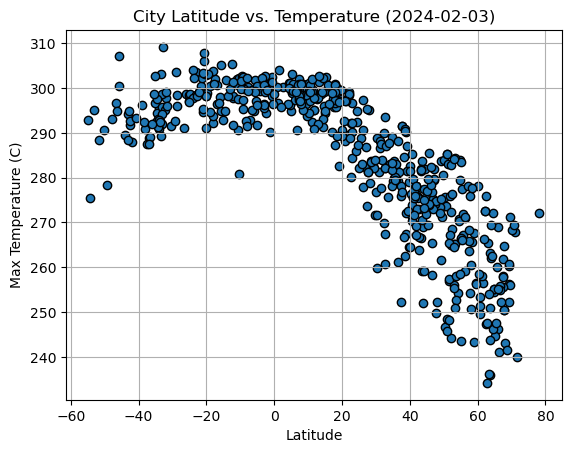

In [14]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],edgecolor="black")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Latitude vs. Temperature (2024-02-03)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

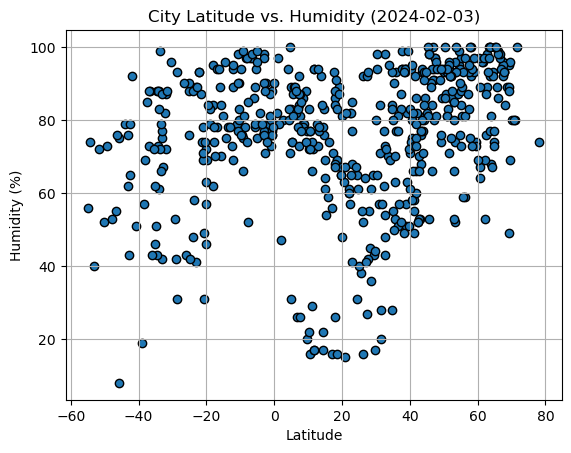

In [15]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (2024-02-03)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

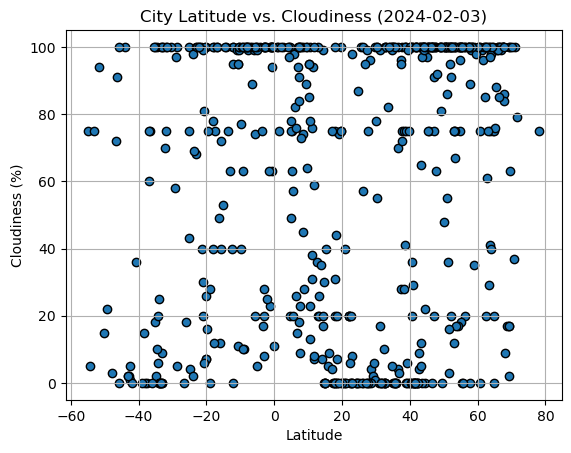

In [16]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (2024-02-03)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

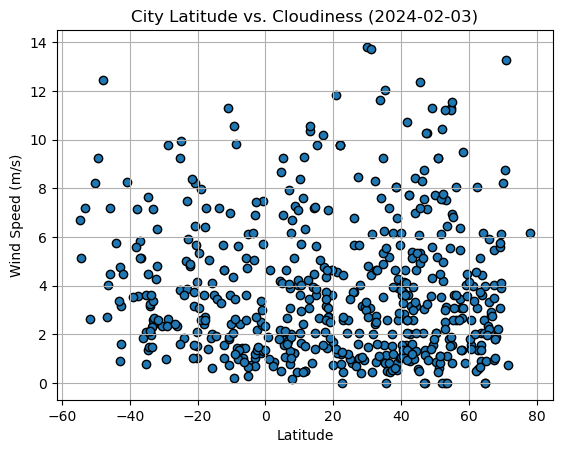

In [17]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs. Cloudiness (2024-02-03)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [34]:
# Define a function to create Linear Regression plots
# The Xpert Learning Assistant helped me with this but it used the seaborn library so had to update it with the correct formula and functions.
def create_linear_regression_plot(x, y):
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    line = slope * x + intercept

    print(f"The r-value is: {r_value}")
    plt.scatter(x,y)
    plt.plot(x, line, color='red')
    line_equation = f"y = {slope:.2f}x +{intercept:.2f}"
    plt.text(0.5,0.9,line_equation,color='red',transform=plt.gca().transAxes)

In [23]:
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,broken hill,-31.9500,141.4333,297.76,72,100,4.80,AU,1707094697
1,waitangi,-43.9535,-176.5597,289.62,79,100,5.74,NZ,1707094251
2,yellowknife,62.4560,-114.3525,247.44,76,20,3.09,CA,1707094516
3,rundu,-17.9333,19.7667,292.31,95,78,2.72,NaN,1707094638
4,blackmans bay,-43.0167,147.3167,294.22,62,2,0.89,AU,1707094520


In [24]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,yellowknife,62.4560,-114.3525,247.44,76,20,3.09,CA,1707094516
5,isafjordur,66.0755,-23.1240,268.90,86,100,5.92,IS,1707094525
6,holmsund,63.7060,20.3641,263.12,92,75,1.54,SE,1707094942
8,nemuro,43.3236,145.5750,266.64,68,65,5.40,JP,1707094646
10,ellensburg,46.9965,-120.5479,279.58,80,91,1.34,US,1707094945


In [25]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,broken hill,-31.9500,141.4333,297.76,72,100,4.80,AU,1707094697
1,waitangi,-43.9535,-176.5597,289.62,79,100,5.74,NZ,1707094251
3,rundu,-17.9333,19.7667,292.31,95,78,2.72,NaN,1707094638
4,blackmans bay,-43.0167,147.3167,294.22,62,2,0.89,AU,1707094520
7,richards bay,-28.7830,32.0377,296.01,93,100,2.64,ZA,1707094594


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8570887414859922


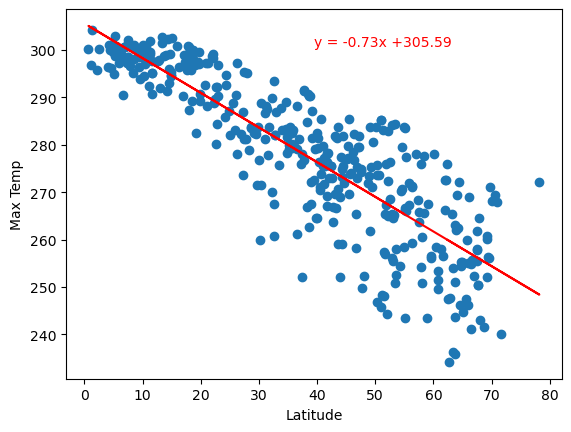

In [35]:
# Linear regression on Northern Hemisphere
create_linear_regression_plot(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])

plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

The r-value is: 0.42631479271503553


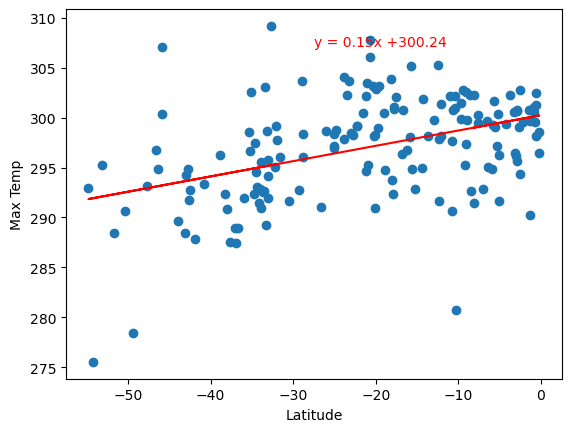

In [36]:
# Linear regression on Southern Hemisphere
create_linear_regression_plot(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])

plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

**Discussion about the linear relationship:** Looking at the linear regression for the latitude and max temp for the northern hemisphere, it looks like as latitude increases, the temperature will decrease signaling that there is a negative correlation. The r-value of -0.857 provides further evidence that their is a negative correlation because a value of r close to -1 means that there is negative correlation between the variables.

Looking at the latitude and max temp for the southern hemisphere, it looks like there is a positive correlation as the slope of the line equation is positive. In the southern hemisphere, as you increase latitude, the temperature will also increase. The r-vlaue also give me solid evidence of a positive correlation between latitude and temperature in the southern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.3596832101854974


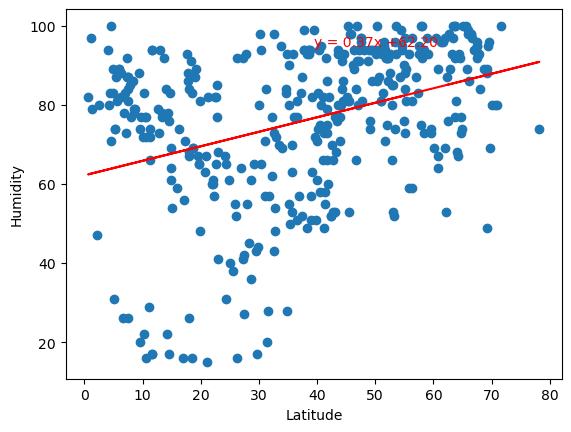

In [37]:
# Northern Hemisphere
create_linear_regression_plot(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

The r-value is: 0.42796116355030156


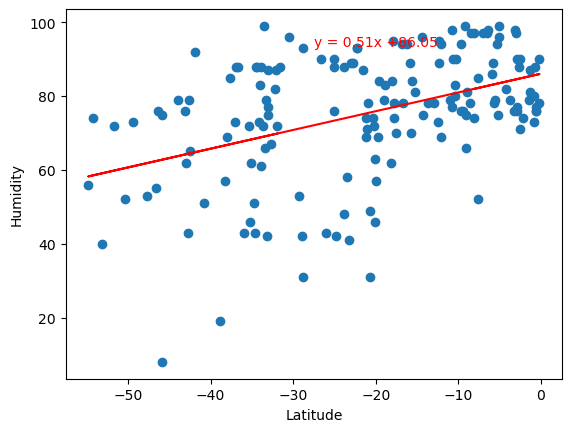

In [38]:
# Southern Hemisphere
create_linear_regression_plot(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

**Discussion about the linear relationship:** For both the northern and southern hemispheres, as the latitude increases, then the humidity will also increase. As further support of this, both r-values are greater than 0.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.24268564698747147


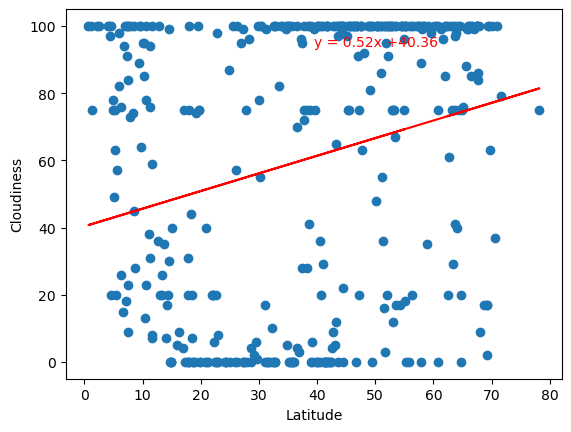

In [39]:
# Northern Hemisphere
create_linear_regression_plot(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

The r-value is: 0.3486936774028216


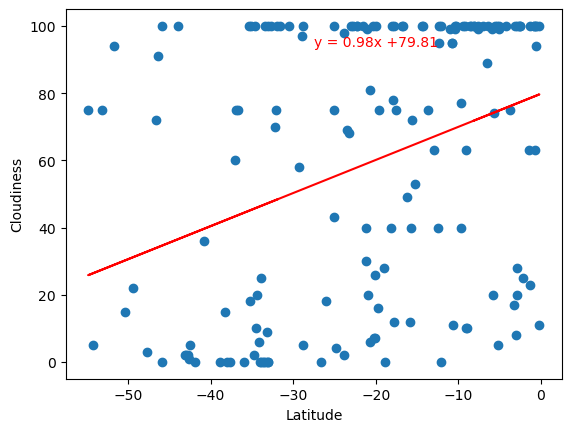

In [40]:
# Southern Hemisphere
create_linear_regression_plot(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

**Discussion about the linear relationship:** At first glance at the layout of the data points, it looks like there is no correlation. However, for both the northern and southern hemispheres, as the latitude increases, then the cloudiness will also increase. Looking at the r-values, they are both slightly larger than 0 telling me that there is a slight positive correlation between latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.01736358095849284


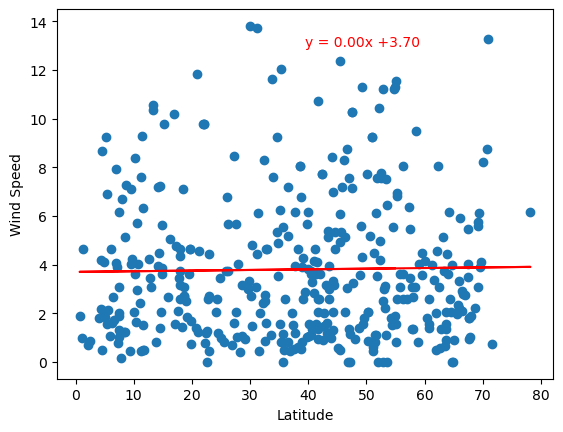

In [41]:
# Northern Hemisphere
create_linear_regression_plot(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

The r-value is: -0.24009450107378455


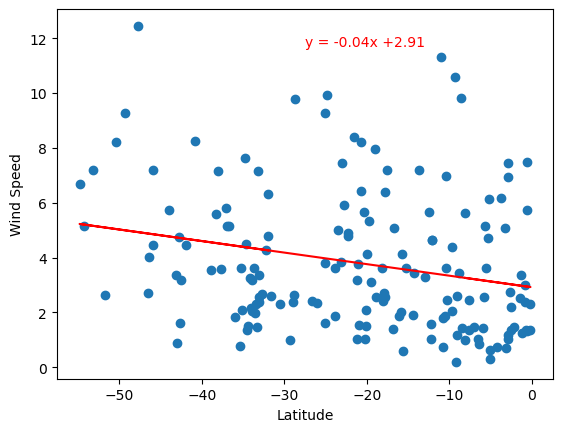

In [42]:
# Southern Hemisphere
create_linear_regression_plot(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

**Discussion about the linear relationship:** In the northern hemisphere, there is not much of a correlation between latitude and wind speed as the r-value is near zero. However, in the southern hemisphere, there is a slight negative correlation between latitude and wind speed as seen by the r-value. The r-value is -0.24 telling me that there is a slight negative correlation.